In [43]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
%run 82_label_modifying.ipynb

/home/arleg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
name = 'normalized_with_meta_log_transformed_substituted_NA_cleaned_control_cleaned_isotopes_cleaned_contaminants_xs_annotated_rats_neg.csv'
df = pd.read_csv(name, index_col=0)

/home/arleg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# redefine later
meta = 4

In [24]:
num = df.loc[df.index[:-meta], samples].astype('float').T

In [25]:
clusters = KMeans(n_clusters=3)
transformed = clusters.fit_predict(num)

In [31]:
set(transformed)

{0, 1, 2}

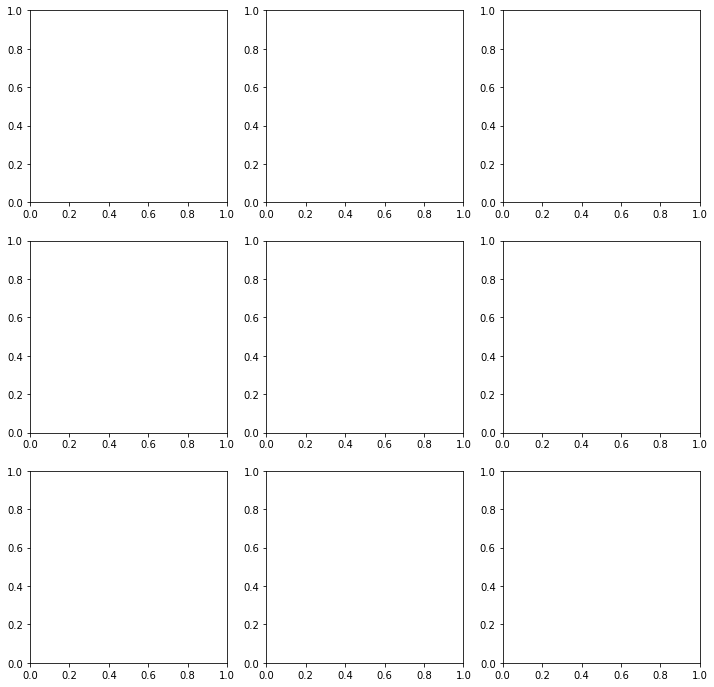

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
errors = []

In [ ]:
for i, ax in enumerate(axes.flat, 1):
    clusters = KMeans(n_clusters=i)
    classes = clusters.fit_predict(num)
    
    errors.append(clusters.inertia_)
    
    transformed = PCA(2).fit_transform(num)
    ax.scatter(transformed[:, 0], transformed[:, 1], c=trf)
    ax.set_title(f'{i} clusters')
    

In [48]:
samples_with_mass = ~df.loc['mass', samples].isna()

In [38]:
num.isin([float('inf')]).any().any()

False

In [64]:
xx = subset(df, {'tissue': 'brain_pfc'})
# y, cl = extract_data_for_plot()

In [66]:
num = xx.iloc[:-meta].astype('float').T

In [71]:
clusters = KMeans(n_clusters=i)
y = clusters.fit_predict(num)

In [73]:
y.shape

(17,)

Explained var is  0.71 0.13


(8174, 2)

Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13
Explained var is  0.6 0.13


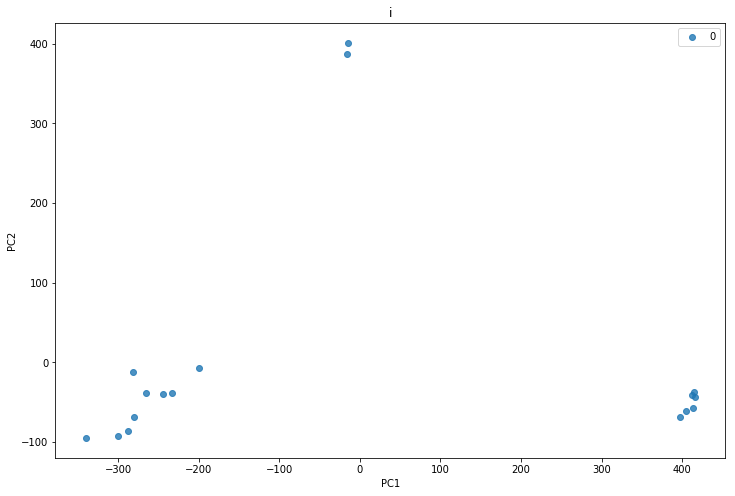

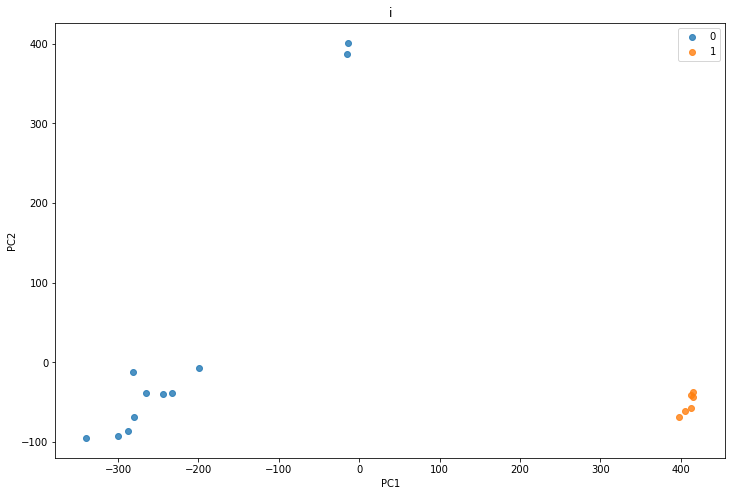

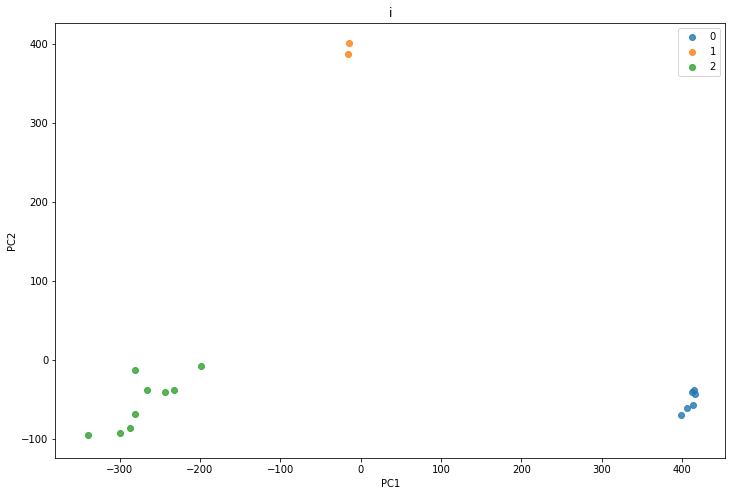

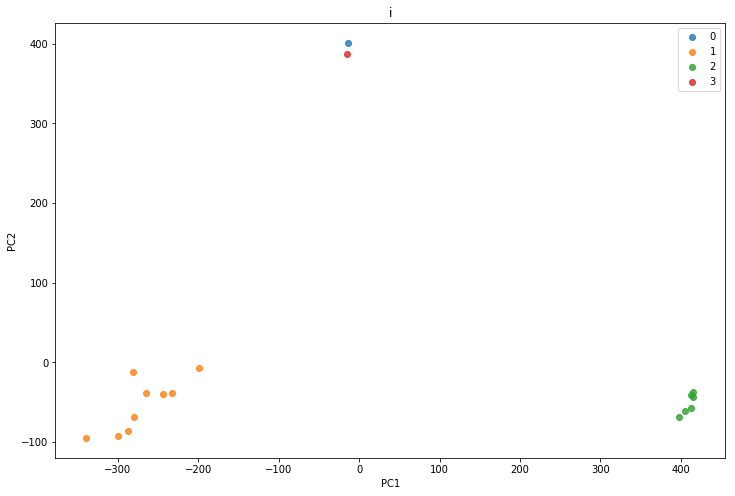

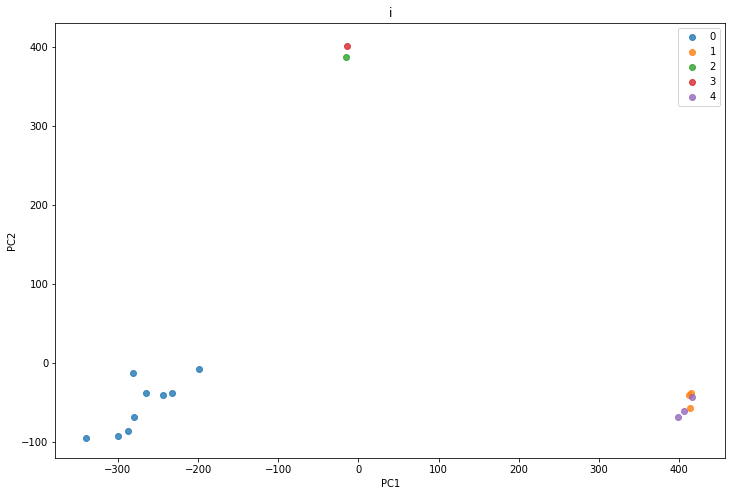

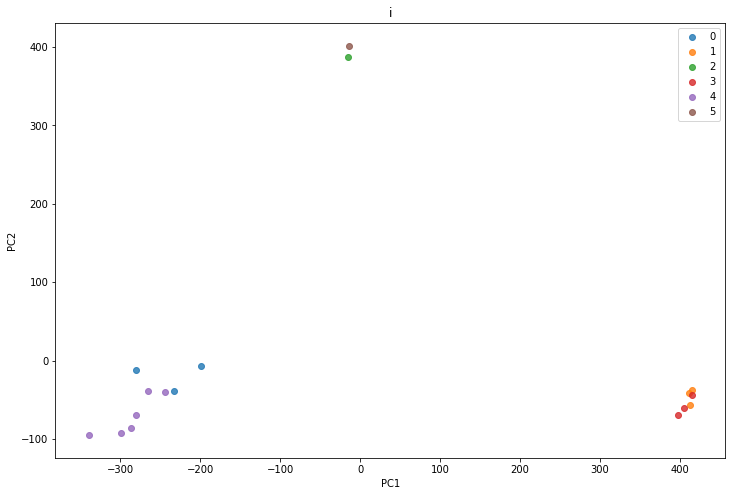

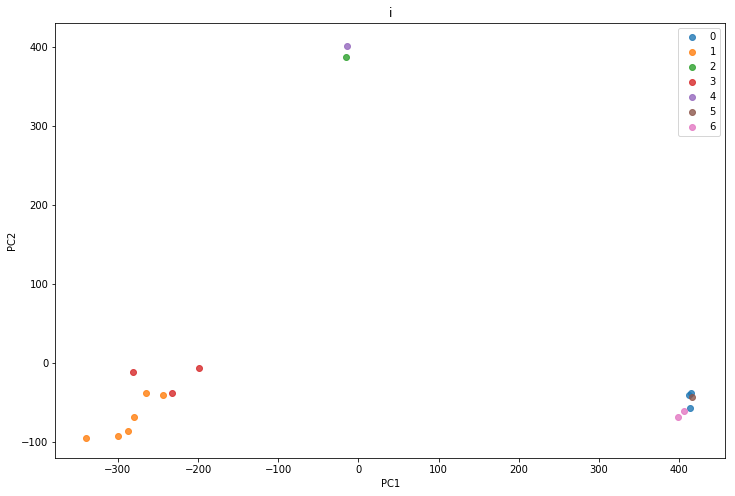

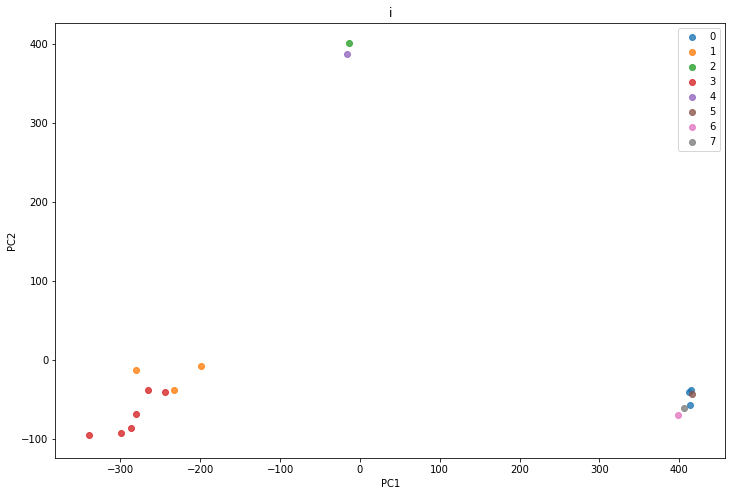

In [78]:
# Seems working
# Be careful with Transposing
# Look how to denote additional feature on plot (age of sample)
for i in range(1, 9):
    clusters = KMeans(n_clusters=i)
    y = clusters.fit_predict(num)
    
    errors.append(clusters.inertia_)
    transformed = pca_transform(num.T)
    
#     plt.scatter(transformed[:, 0], transformed[:, 1], c=y);
#     plt.figure;
    draw_dimensionality_reduction('i', transformed, y, set(y), title='i')   

In [46]:
def subset(df, include, exclude={}, with_mass=True):
    """
    Take appropriate slice of data, use samples_with_mass constant which should be predefined. 
    At least one of include and exclude should be provided, could be both
    :param df: df - dataframe merged with metadata
    :param include: dict - dictionary with feature: variant to include variant of feature from output df
                           other appropriate format is feature: [variants] to include all listed variants
    :param exclude: dict - dictionary with feature: variant to exclude variant of feature from output df
                           other appropriate format is feature: [variants] to exclude all listed variants
    :param with_mass: boolean - whether to exclude samples without known mass,
                                idk why I have included this option - it always should be True
    :return: df - subset of input df
    """
    # Create a copy of original df
    df = df.copy()
    # Initialize condition with neutral element
    cond = True

    # For features in include add to condition appropriate columns
    for feature, variant in include.items():
        # Add single variant
        if type(variant) is str:
            cond &= (df.loc[feature] == variant)
        # Add several variants
        else:
            cond &= df.loc[feature].isin(variant)
    
    # For features in include add to condition appropriate columns
    for feature, variant in exclude.items():
            # Remove single variant
            if type(variant) is str:
                cond &= (df.loc[feature] != variant)
            # Remove several variants
            else:
                cond &= ~df.loc[feature].isin(variant)
    
    # Imho this condition is always true, hence with_mass parameter should be removed
    # Take only columns with present mass
    if with_mass:
        return df.loc[:, cond & samples_with_mass]
    # Take all selected columns
    return df.loc[:, cond]


def extract_data_for_plot(df, sample_feature):
    """
    Take label series of data and all unique possible variants of this label type
    :param df: df - part of samples from dataframe merged with metadata
    :param sample_feature: str - index of row containing variants by which samples will be divided on the plot
    :return: df - subset of input df
    """
    # Take series
    y = df.loc[sample_feature]
    # Take unique variants
    classes = df.loc[sample_feature].unique()
    return y, classes


def pca_transform(df, n_components=2):
    """
    Transform data for PCA, meta constant should be predefined
    :param df: df - subset of dataframe merged with metadata
    :param n_components: int - number of components
    :return: array - np array with number of samples x n_components shape 
    """
    # Initialize transformer
    pca = PCA(n_components=n_components)
    # Take numeric subset of data and
    # Transpose df, because as we love in ml ROWS are observations and COLUMNS are features and
    # all normal functions follow this convention. Thus we finally transpose df to normal form
    transformed = pca.fit_transform(df.iloc[:-meta].T)
    # Display info about percantages
    variance = pca.explained_variance_ratio_
    print('Explained var is ', *tuple(map(lambda x: np.round(x, 2), variance)))
    return transformed

In [28]:
def draw_dimensionality_reduction(name, transformed, y, classes, colors=None, title='PCA', locus='best'):
    """
    Plot results of dimensionality collapsing
    :param name: str - name of saved figure
    :param transformed: array - 2d array with transformed data
    :param y: sequence - collection of observation labels e.g. old/young for age, bones/blood for tiessue etc.
    :param classes: sequence - container with unique labels of observations
    :param colors: sequence - container with colors in #HHHHHH format where H is a hex digit
    :param title: str - title of figure
    :param locus: str - position of legend
    :return:
    """
    # Specify plot size
    plt.figure(figsize=(12, 8))

    # Use specified colors if provided
    if colors:
        for sp, color in zip(classes, colors):
            plt.scatter(transformed[sp == y, 0],
                        transformed[sp == y, 1],
                        alpha=0.8, color=color, label=sp)
    else:
        for sp in classes:
            plt.scatter(transformed[sp == y, 0],
                        transformed[sp == y, 1],
                        alpha=0.8, label=sp)

    # Metadata
    xlab = 'PC1'
    ylab = 'PC2'
    plt.legend(loc=locus, shadow=False)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)

    # Create dir for images and save svg image
    os.makedirs('img', exist_ok=True)
    plt.savefig(f'img/{name}', format='svg', bbox_inches='tight')